## Expense Trends and Departmental Analysis (Flag 43)

### Dataset Description
The dataset consists of 642 entries, capturing detailed records of financial expenses within an organization. The data simulates the ServiceNow `fm_expense_line` table, including key fields such as 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'processed_date', 'source_id', and 'type'. This dataset documents the flow of financial transactions, offering a comprehensive view of organizational spending by detailing the amount, departmental allocation, and nature of each expense. It highlights different expense categories, departmental spending patterns, and the processing state of each entry, providing valuable insights into both the financial operations and the efficiency of expense processing within the organization.

### Your Task
**Goal**: To analyze departmental spending patterns, uncover insights into expense allocation across categories, and assess the efficiency of the expense processing workflow.

**Role**: Financial Analyst

**Difficulty**: 3 out of 5.

**Category**: Finance Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from openai import OpenAI
from pandas import date_range

from insightbench import utils as ut

### Load Dataset
This cell loads the expense dataset to be analyzed. The data is orginally saved in the from a CSV file, and is here imported into a DataFrame. The steps involve specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [2]:
dataset_path = "csvs/flag-43.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()

,department,type,state,processed_date,user,amount,category,source_id,opened_at,number,short_description,ci,processing_time_hours
0,Customer Support,NaN,Processed,2023-04-29 04:20:00,Shelley Groden,1737.0,Travel,NaN,2023-04-23 04:20:00,EXP00000000,Travel related hardware asset,Dell Latitude 7420,NaN
1,Product Management,NaN,Declined,NaN,Mamie Mcintee,1988.0,Services,BME-72243876,2023-12-23 01:44:00,EXP00000001,Registered new service hardware asset,Virtual Private Network Service,NaN
2,Customer Support,NaN,Pending,NaN,Marianne Earman,4339.2,Assets,DKA-86353102,2023-06-02 19:47:00,EXP00000002,Asset Acquisition: High-Performance Dell Optip...,Dell Optiplex 7090,NaN
3,IT,NaN,Processed,2023-04-05 00:44:00,Vernon Engelman,7724.0,Assets,DGP-68065803,2023-03-07 00:44:00,EXP00000003,Automatically recorded entry for new assets ac...,Dell Latitude 7410,NaN
4,Customer Support,NaN,Processed,2023-07-27 11:03:00,Mabel Weeden,7603.0,Assets,ZTI-08993736,2023-06-27 11:03:00,EXP00000004,Automatically created asset registration,Dell Latitude 7450,NaN


### **Question 1: What are the total expenses by department?**

This analysis will help identify which departments are incurring the most significant expenses. By summing up the expenses for each department, we can gain insights into how financial resources are allocated across the organization.

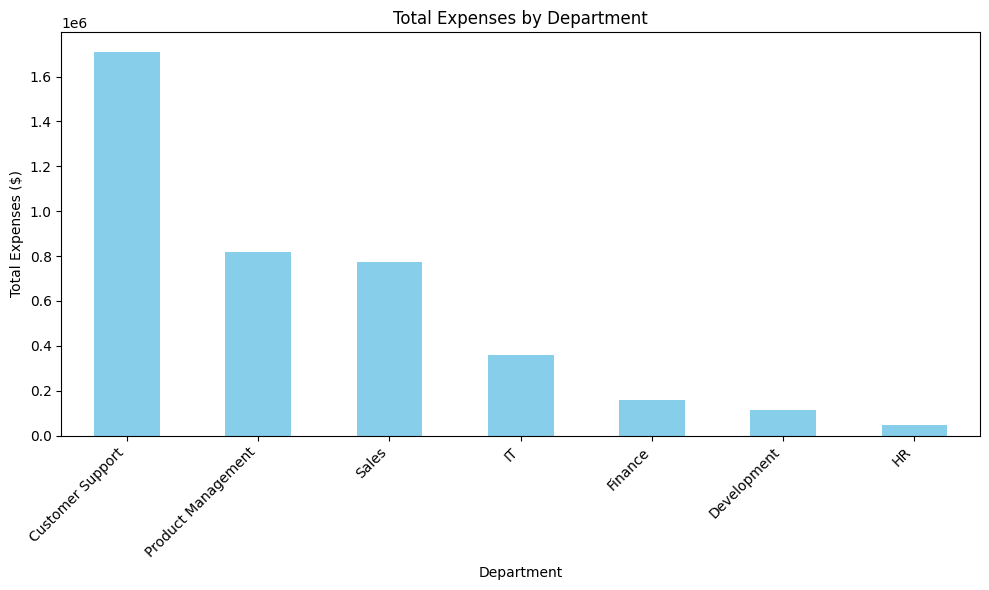

In [3]:
import matplotlib.pyplot as plt

# Group by department and sum the amount
department_expenses = df.groupby('department')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
department_expenses.plot(kind='bar', color='skyblue')
plt.title('Total Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "Total expenses vary significantly across departments.",
    "insight_value": {
        "description": "The Customer Support department has the highest total expenses, followed by Product Management, indicating that these departments might have more resource-intensive operations."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Product Management", "Sales", "IT", "Finance", "Development", "HR"],
            "description": "This axis categorizes departments to illustrate the variations in total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Customer Support": "1711473.1$",
                "Product Management": "819572.2$",
                "Sales": "775657.54$",
                "IT": "357855.2$",
                "Finance": "160519.4$",
                "Development": "113001.1$",
                "HR": "47102.8$"
            },
            "description": "This axis displays the total expense amount in dollars for each department."
        },
        "description": "The bar chart highlights the departments with the highest expenses, which might indicate areas of heavy resource allocation or potential inefficiencies."
    },
    "question": "What are the total expenses by department?",
    "actionable_insight": {
        "description": "Departments with higher expenses should be reviewed to ensure that spending aligns with organizational goals. It's crucial to investigate whether these expenditures are justified and contribute positively to the organization's operations."
    }
}


{'data_type': 'descriptive',
 'insight': 'Total expenses vary significantly across departments.',
 'insight_value': {'description': 'The Customer Support department has the highest total expenses, followed by Product Management, indicating that these departments might have more resource-intensive operations.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Product Management',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR'],
   'description': 'This axis categorizes departments to illustrate the variations in total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Customer Support': '1711473.1$',
    'Product Management': '819572.2$',
    'Sales': '775657.54$',
    'IT': '357855.2$',
    'Finance': '160519.4$',
    'Development': '113001.1$',
    'HR': '47102.8$'},
   'description': 'This axis displays the total expense amount in dollars for each dep

### **Question 2:** What are the average expenses per user within each department?

This analysis will reveal the average expense per user within each department. This insight helps to understand individual spending behavior and whether there are significant discrepancies across departments.

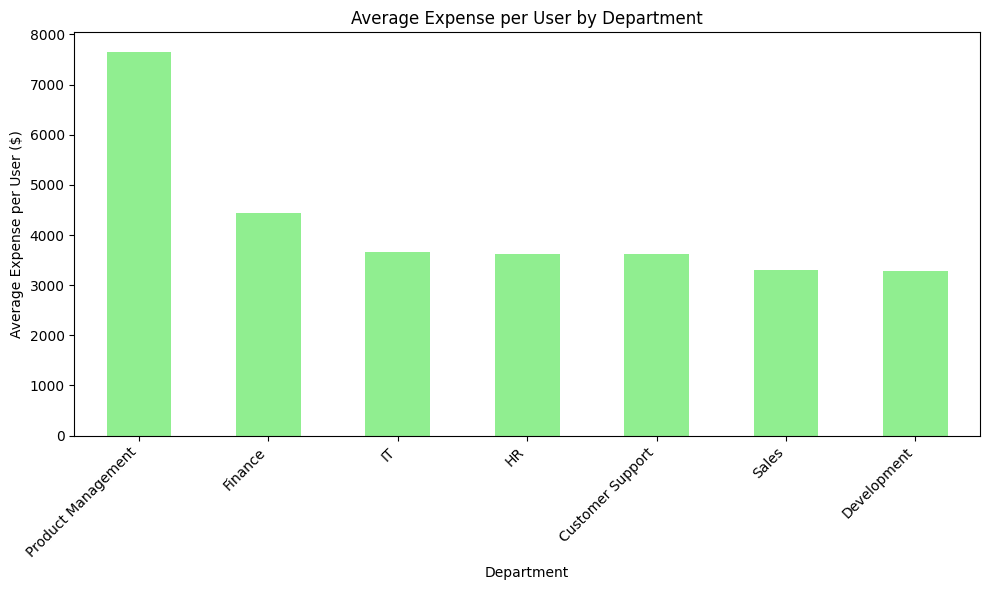

In [5]:
# Group by department and user, then calculate the average amount
average_expense_per_user = df.groupby(['department', 'user'])['amount'].mean().groupby('department').mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_expense_per_user.plot(kind='bar', color='lightgreen')
plt.title('Average Expense per User by Department')
plt.xlabel('Department')
plt.ylabel('Average Expense per User ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
{
    "data_type": "descriptive",
    "insight": "Product Management has the highest average expense claims.",
    "insight_value": {
        "description": "Product Management's average expense claim is approximately $7659.55, which is significantly higher than the other departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Expense by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Product Management", "Finance", "IT", "HR", "Customer Support", "Sales", "Development"],
            "description": "This axis categorizes departments to show the average expense per claim."
        },
        "y_axis": {
            "name": "Average Expense ($)",
            "value": {
                "Product Management": "7659.55$",
                "Finance": "4458.87$",
                "IT": "3727.66$",
                "HR": "3623.29$",
                "Customer Support": "3595.53$",
                "Sales": "3300.67$",
                "Development": "3054.08$"
            },
            "description": "This axis displays the average amount in dollars for each department."
        },
        "description": "The bar chart highlights that Product Management has a much higher average expense per claim, which may indicate the nature of their operations or potential inefficiencies."
    },
    "question": "What is the average expense by department?",
    "actionable_insight": {
        "description": "It's advisable to review the expense claims in Product Management to ensure they align with company policies and provide value. High average expenses should be justified by the department's activities."
    }
}


{'data_type': 'descriptive',
 'insight': 'Product Management has the highest average expense claims.',
 'insight_value': {'description': "Product Management's average expense claim is approximately $7659.55, which is significantly higher than the other departments."},
 'plot': {'plot_type': 'bar',
  'title': 'Average Expense by Department',
  'x_axis': {'name': 'Department',
   'value': ['Product Management',
    'Finance',
    'IT',
    'HR',
    'Customer Support',
    'Sales',
    'Development'],
   'description': 'This axis categorizes departments to show the average expense per claim.'},
  'y_axis': {'name': 'Average Expense ($)',
   'value': {'Product Management': '7659.55$',
    'Finance': '4458.87$',
    'IT': '3727.66$',
    'HR': '3623.29$',
    'Customer Support': '3595.53$',
    'Sales': '3300.67$',
    'Development': '3054.08$'},
   'description': 'This axis displays the average amount in dollars for each department.'},
  'description': 'The bar chart highlights that Produ

### **Question 3:What are the total expenses by category?**


Understanding the distribution of expenses across different categories can help identify areas where the company is spending the most and potentially optimize costs.



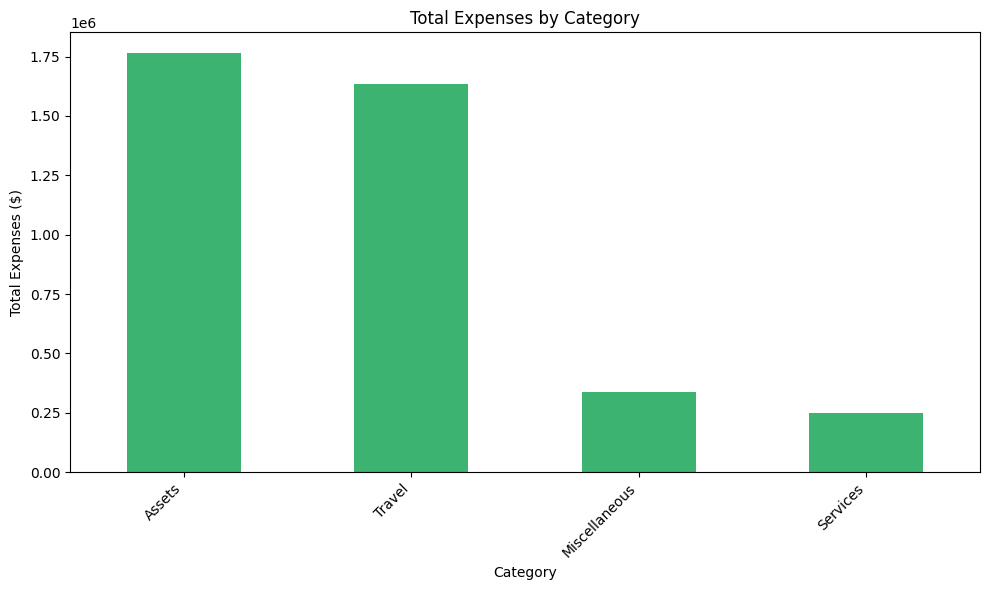

In [7]:
import matplotlib.pyplot as plt

# Group by category and sum the amount
total_expenses_by_category = df.groupby('category')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
total_expenses_by_category.plot(kind='bar', color='mediumseagreen')
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "The 'Assets' category has the highest total expenses.",
    "insight_value": {
        "description": "The company has spent a total of $1,763,971.40 on assets, which is the highest among all categories."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Assets", "Travel", "Miscellaneous", "Services"],
            "description": "This axis categorizes expenses into different categories to show the total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Assets": "1763971.40$",
                "Travel": "1633771.20$",
                "Miscellaneous": "338897.28$",
                "Services": "248541.46$"
            },
            "description": "This axis displays the total expense amount in dollars for each category."
        },
        "description": "The bar chart highlights that 'Assets' is the category with the highest spending, indicating significant investments in tangible items."
    },
    "question": "What are the total expenses by category?",
    "actionable_insight": {
        "description": "The high spending on assets should be regularly reviewed to ensure that these investments are necessary and beneficial to the company. Potential cost-saving measures could be explored in categories with high expenses."
    }
}


{'data_type': 'descriptive',
 'insight': "The 'Assets' category has the highest total expenses.",
 'insight_value': {'description': 'The company has spent a total of $1,763,971.40 on assets, which is the highest among all categories.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Category',
  'x_axis': {'name': 'Category',
   'value': ['Assets', 'Travel', 'Miscellaneous', 'Services'],
   'description': 'This axis categorizes expenses into different categories to show the total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Assets': '1763971.40$',
    'Travel': '1633771.20$',
    'Miscellaneous': '338897.28$',
    'Services': '248541.46$'},
   'description': 'This axis displays the total expense amount in dollars for each category.'},
  'description': "The bar chart highlights that 'Assets' is the category with the highest spending, indicating significant investments in tangible items."},
 'question': 'What are the total expenses by category?',
 'a

### **Question 4:  How many expenses have been processed by each department?**


This analysis reveals the workload and activity level of each department by showing the number of expenses that have been processed.

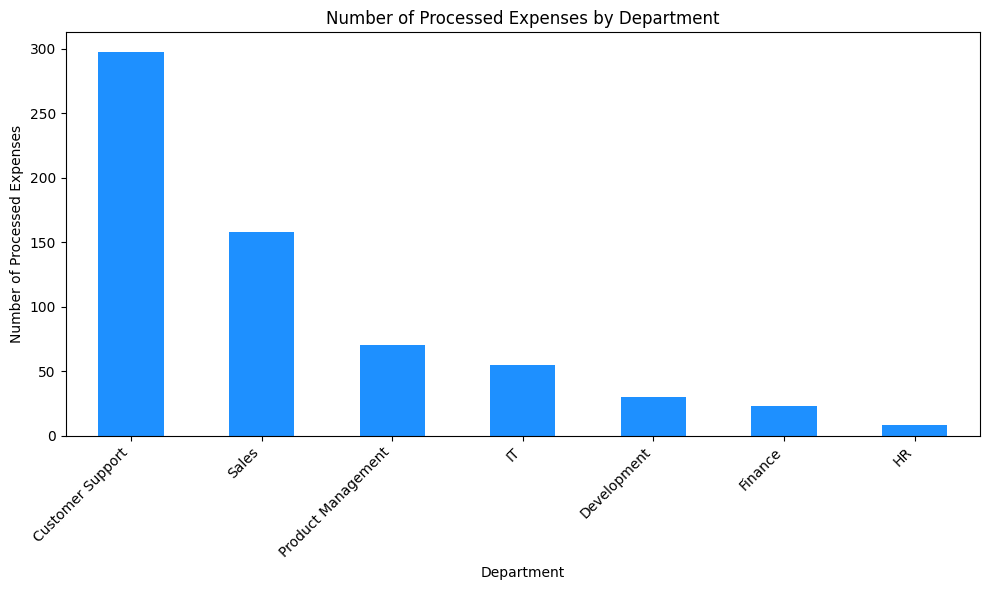

In [9]:
import matplotlib.pyplot as plt

# Filter for processed expenses and group by department
processed_expenses_by_department = df[df['state'] == 'Processed'].groupby('department').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
processed_expenses_by_department.plot(kind='bar', color='dodgerblue')
plt.title('Number of Processed Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Number of Processed Expenses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "Customer Support has processed the most expense claims.",
    "insight_value": {
        "description": "Customer Support has processed 298 expenses, indicating a high level of activity and operational needs."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Processed Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "Product Management", "IT", "Development", "Finance", "HR"],
            "description": "This axis categorizes departments to show the number of processed expense claims."
        },
        "y_axis": {
            "name": "Number of Processed Expenses",
            "value": {
                "Customer Support": 298,
                "Sales": 158,
                "Product Management": 70,
                "IT": 55,
                "Development": 30,
                "Finance": 23,
                "HR": 8
            },
            "description": "This axis displays the number of processed expenses for each department."
        },
        "description": "The bar chart shows that Customer Support has handled the most expense claims, reflecting the operational demands of this department."
    },
    "question": "How many expenses have been processed by each department?",
    "actionable_insight": {
        "description": "Given the high volume of processed expenses in Customer Support, it might be necessary to evaluate the efficiency of their processes and ensure they have adequate resources to manage this workload."
    }
}


{'data_type': 'descriptive',
 'insight': 'Customer Support has processed the most expense claims.',
 'insight_value': {'description': 'Customer Support has processed 298 expenses, indicating a high level of activity and operational needs.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Processed Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'Product Management',
    'IT',
    'Development',
    'Finance',
    'HR'],
   'description': 'This axis categorizes departments to show the number of processed expense claims.'},
  'y_axis': {'name': 'Number of Processed Expenses',
   'value': {'Customer Support': 298,
    'Sales': 158,
    'Product Management': 70,
    'IT': 55,
    'Development': 30,
    'Finance': 23,
    'HR': 8},
   'description': 'This axis displays the number of processed expenses for each department.'},
  'description': 'The bar chart shows that Customer Support has handled the most expense claims, refl

### **Question 5:  What is the average processing time by department?**


This analysis will provide insights into how quickly each department processes expenses, which can highlight potential bottlenecks or efficiency issues.

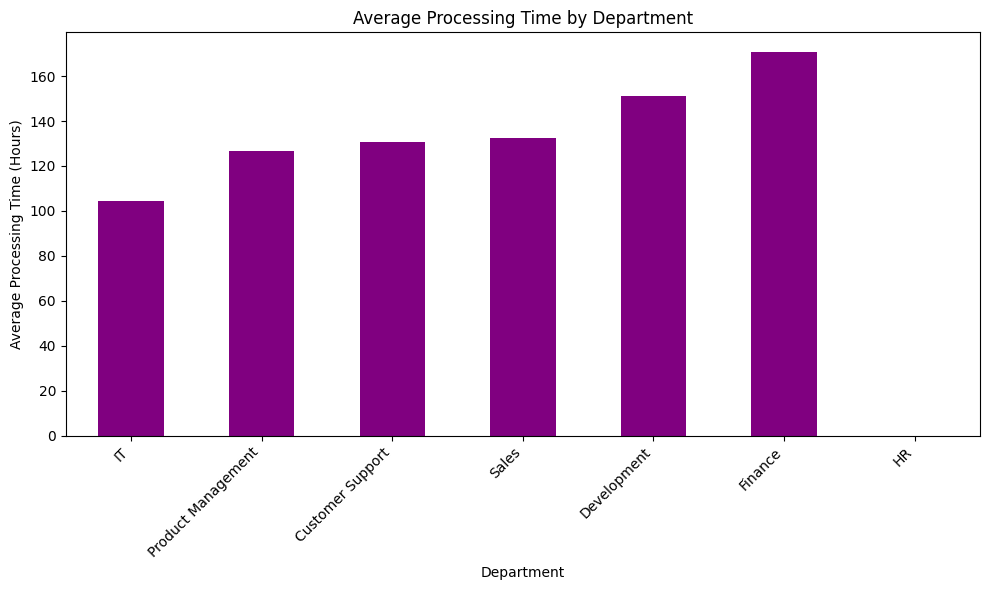

In [11]:
import matplotlib.pyplot as plt

# Group by department and calculate the average processing time for processed expenses
average_processing_time_by_department = df[df['state'] == 'Processed'].groupby('department')['processing_time_hours'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
average_processing_time_by_department.plot(kind='bar', color='purple')
plt.title('Average Processing Time by Department')
plt.xlabel('Department')
plt.ylabel('Average Processing Time (Hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "descriptive",
    "insight": "The IT department has the quickest average processing time for expenses.",
    "insight_value": {
        "description": "The IT department processes expenses in an average of 104.51 hours, which is the fastest among all departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Product Management", "Customer Support", "Sales", "Development", "Finance", "HR"],
            "description": "This axis categorizes departments to show the average processing time of expense claims."
        },
        "y_axis": {
            "name": "Average Processing Time (Hours)",
            "value": {
                "IT": "104.51 hours",
                "Product Management": "126.66 hours",
                "Customer Support": "130.55 hours",
                "Sales": "132.42 hours",
                "Development": "151.11 hours",
                "Finance": "170.92 hours",
                "HR": "N/A"
            },
            "description": "This axis displays the average processing time in hours for each department."
        }
    },
    "description": "The bar chart illustrates the average processing time for expense claims in different departments, with IT having the shortest processing time."
}


{'data_type': 'descriptive',
 'insight': 'The IT department has the quickest average processing time for expenses.',
 'insight_value': {'description': 'The IT department processes expenses in an average of 104.51 hours, which is the fastest among all departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT',
    'Product Management',
    'Customer Support',
    'Sales',
    'Development',
    'Finance',
    'HR'],
   'description': 'This axis categorizes departments to show the average processing time of expense claims.'},
  'y_axis': {'name': 'Average Processing Time (Hours)',
   'value': {'IT': '104.51 hours',
    'Product Management': '126.66 hours',
    'Customer Support': '130.55 hours',
    'Sales': '132.42 hours',
    'Development': '151.11 hours',
    'Finance': '170.92 hours',
    'HR': 'N/A'},
   'description': 'This axis displays the average processing time in hours for each departme

### Summary of Findings (Flag 43):

1. **Total Expenses by Department:** The Customer Support department has the highest total expenses, amounting to $1,711,473.10. This indicates that Customer Support is a major area of spending within the organization, which may reflect higher operational demands or resource needs compared to other departments.

2. **Average Expense by Department:** Product Management has the highest average expense per claim at $7,659.55, significantly more than other departments. This suggests that expenses in Product Management are higher, possibly due to the nature of its projects or spending practices that may require further review.

3. **Total Expenses by Category:** The 'Assets' category dominates in terms of spending, with total expenses reaching $1,763,971.40. This reflects substantial investments in physical assets, indicating a focus on asset acquisition within the organization. The 'Travel' category is also a significant area of expense, underscoring the importance of mobility and travel-related activities.